## K-Means Clustering

In [ ]:
#mporting the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the dataset

In [4]:
dataset=sns.load_dataset('iris')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
X=dataset[['sepal_length','sepal_width','petal_length','petal_width']].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#Using the elbow method to find the optimal number of clusters

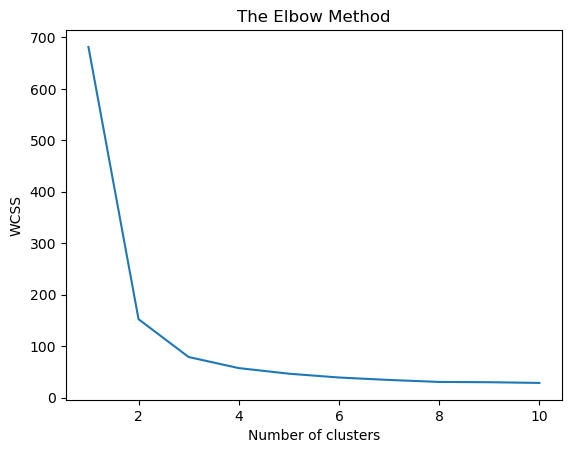

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


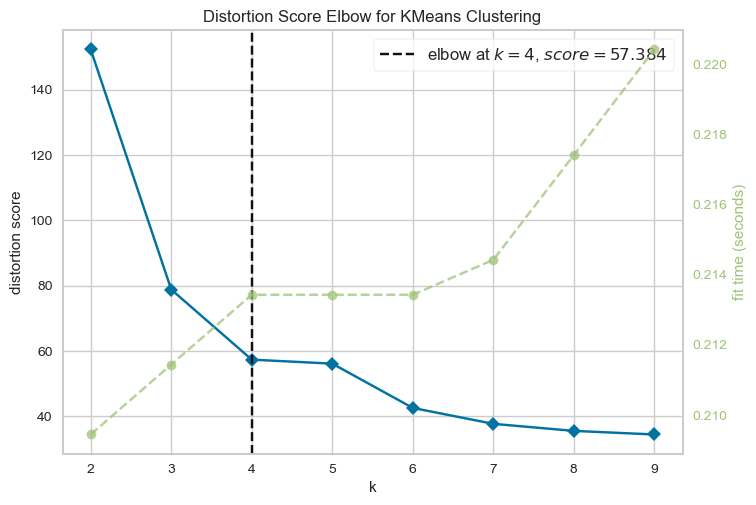

In [7]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

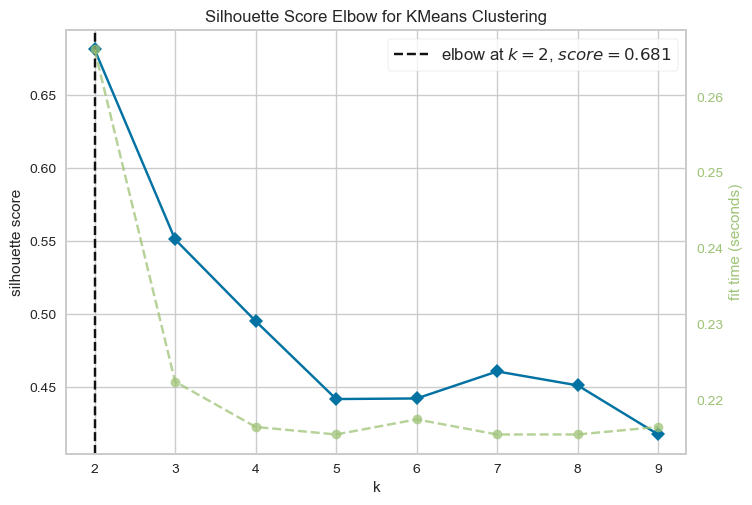

In [8]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

In [ ]:
#Training the K-Means model on the dataset

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
dataset['cluster']= kmeans.fit_predict(X)
dataset['cluster']=dataset['cluster']+1
dataset['cluster']

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    3
147    1
148    1
149    3
Name: cluster, Length: 150, dtype: int32

In [ ]:
#Visualising the clusters

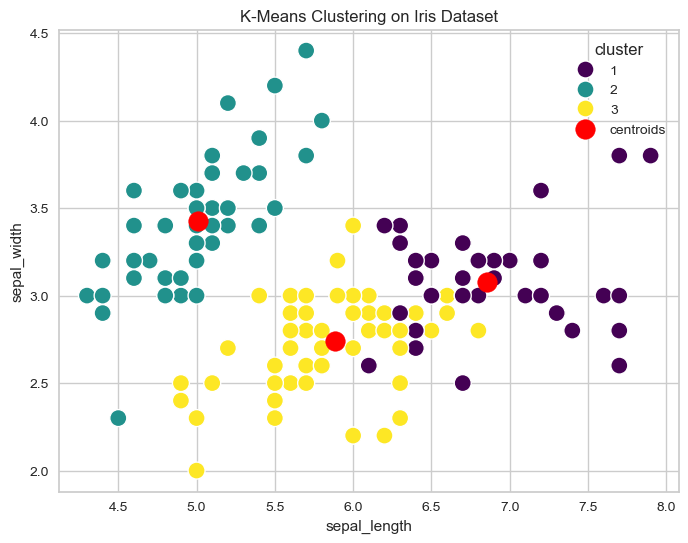

In [10]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset['sepal_length'],y=dataset['sepal_width'],palette='viridis',hue=dataset['cluster'],s=150)#,style=dataset['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red',label='centroids',s=200)
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(title='cluster')
plt.show()

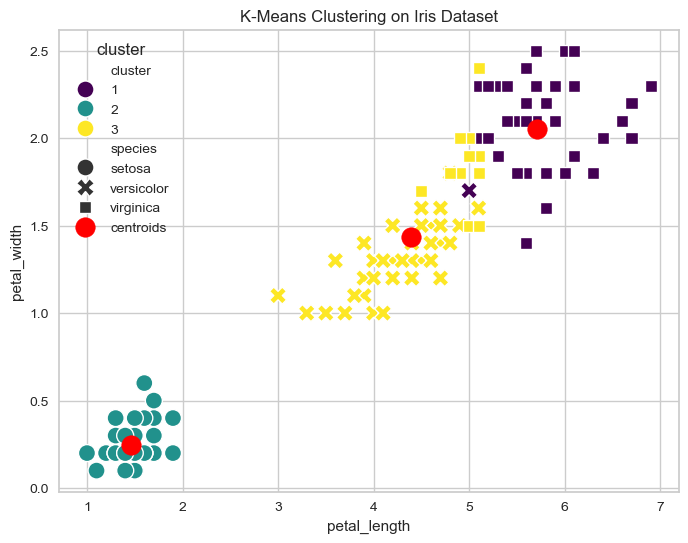

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset['petal_length'],y=dataset['petal_width'],palette='viridis',hue=dataset['cluster'],s=150,style=dataset['species'])
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],c='red',label='centroids',s=200)
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(title='cluster')
plt.show()